<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,59.884153,918.671181,988.555334,-102.142023,1090.697357
1,0.0,1.0,66.724752,298.290964,375.015716,-210.267331,585.283047
2,0.0,2.0,24.656573,-48.604981,-13.948407,454.679526,-468.627933
3,0.0,3.0,42.112686,1222.152268,1274.264955,178.761059,1095.503896
4,0.0,4.0,46.237180,-2371.242074,-2315.004894,113.567618,-2428.572512
...,...,...,...,...,...,...,...
59995,999.0,55.0,36.994879,161.078886,208.073765,26.476372,181.597394
59996,999.0,56.0,97.253345,-4009.640375,-3902.387030,-229.975551,-3672.411479
59997,999.0,57.0,89.532993,-4301.444841,-4201.911848,-197.118772,-4004.793076
59998,999.0,58.0,52.830395,-1750.091460,-1687.261065,-40.917453,-1646.343613


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,59.884153,918.671181,988.555334,-102.142023,1090.697357
1,0.0,1.0,66.724752,298.290964,375.015716,-210.267331,585.283047
2,0.0,2.0,24.656573,-48.604981,-13.948407,454.679526,-468.627933
3,0.0,3.0,42.112686,1222.152268,1274.264955,178.761059,1095.503896
4,0.0,4.0,46.237180,-2371.242074,-2315.004894,113.567618,-2428.572512
...,...,...,...,...,...,...,...
59995,999.0,55.0,36.994879,161.078886,208.073765,26.476372,181.597394
59996,999.0,56.0,97.253345,-4009.640375,-3902.387030,-229.975551,-3672.411479
59997,999.0,57.0,89.532993,-4301.444841,-4201.911848,-197.118772,-4004.793076
59998,999.0,58.0,52.830395,-1750.091460,-1687.261065,-40.917453,-1646.343613


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    59.884153   918.671181   988.555334 -102.142023  1090.697357
      1.0    66.724752   298.290964   375.015716 -210.267331   585.283047
      2.0    24.656573   -48.604981   -13.948407  454.679526  -468.627933
      3.0    42.112686  1222.152268  1274.264955  178.761059  1095.503896
      4.0    46.237180 -2371.242074 -2315.004894  113.567618 -2428.572512
...                ...          ...          ...         ...          ...
999.0 55.0   36.994879   161.078886   208.073765   26.476372   181.597394
      56.0   97.253345 -4009.640375 -3902.387030 -229.975551 -3672.411479
      57.0   89.532993 -4301.444841 -4201.911848 -197.118772 -4004.793076
      58.0   52.830395 -1750.091460 -1687.261065  -40.917453 -1646.343613
      59.0   20.515164  -385.424466  -354.909302   96.611825  -451.521127

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    59.884153   918.671181   988.555334 -102.142023  1090.697357
      1.0    66.724752   298.290964   375.015716 -210.267331   585.283047
      2.0    24.656573   -48.604981   -13.948407  454.679526  -468.627933
      3.0    42.112686  1222.152268  1274.264955  178.761059  1095.503896
      4.0    46.237180 -2371.242074 -2315.004894  113.567618 -2428.572512
...                ...          ...          ...         ...          ...
999.0 55.0   36.994879   161.078886   208.073765   26.476372   181.597394
      56.0   97.253345 -4009.640375 -3902.387030 -229.975551 -3672.411479
      57.0   89.532993 -4301.444841 -4201.911848 -197.118772 -4004.793076
      58.0   52.830395 -1750.091460 -1687.261065  -40.917453 -1646.343613
      59.0   20.515164  -385.424466  -354.909302   96.611825  -451.521127

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,59.884153,918.671181,988.555334,-102.142023,1090.697357
1,0.0,1.0,66.724752,298.290964,375.015716,-210.267331,585.283047
2,0.0,2.0,24.656573,-48.604981,-13.948407,454.679526,-468.627933
3,0.0,3.0,42.112686,1222.152268,1274.264955,178.761059,1095.503896
4,0.0,4.0,46.237180,-2371.242074,-2315.004894,113.567618,-2428.572512
...,...,...,...,...,...,...,...
59995,999.0,55.0,36.994879,161.078886,208.073765,26.476372,181.597394
59996,999.0,56.0,97.253345,-4009.640375,-3902.387030,-229.975551,-3672.411479
59997,999.0,57.0,89.532993,-4301.444841,-4201.911848,-197.118772,-4004.793076
59998,999.0,58.0,52.830395,-1750.091460,-1687.261065,-40.917453,-1646.343613


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    59.884153   918.671181   988.555334 -102.142023  1090.697357
      1.0    66.724752   298.290964   375.015716 -210.267331   585.283047
      2.0    24.656573   -48.604981   -13.948407  454.679526  -468.627933
      3.0    42.112686  1222.152268  1274.264955  178.761059  1095.503896
      4.0    46.237180 -2371.242074 -2315.004894  113.567618 -2428.572512
...                ...          ...          ...         ...          ...
999.0 55.0   36.994879   161.078886   208.073765   26.476372   181.597394
      56.0   97.253345 -4009.640375 -3902.387030 -229.975551 -3672.411479
      57.0   89.532993 -4301.444841 -4201.911848 -197.118772 -4004.793076
      58.0   52.830395 -1750.091460 -1687.261065  -40.917453 -1646.343613
      59.0   20.515164  -385.424466  -354.909302   96.611825  -451.521127

[60000 rows x 5 columns]

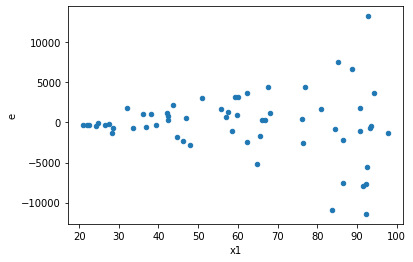

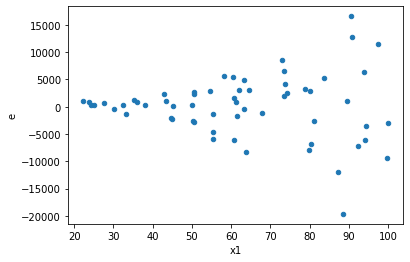

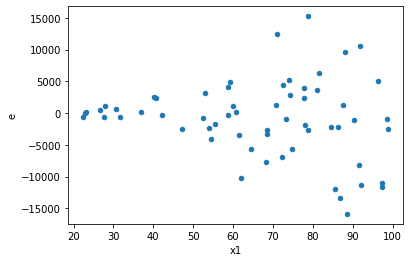

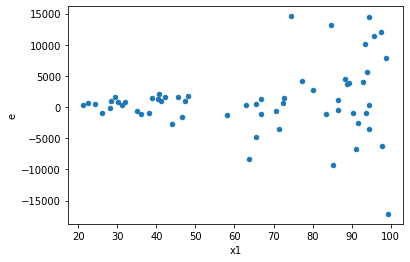

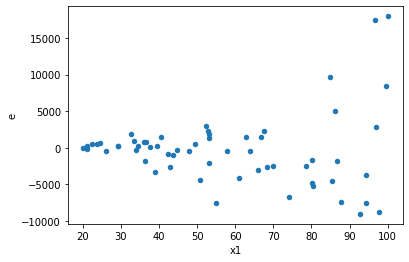

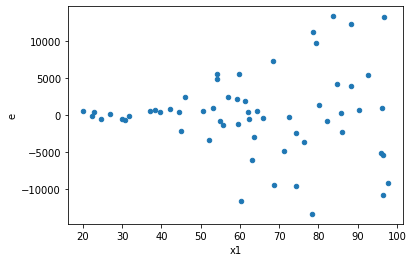

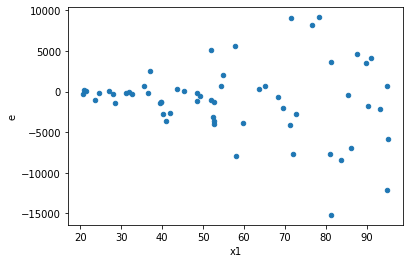

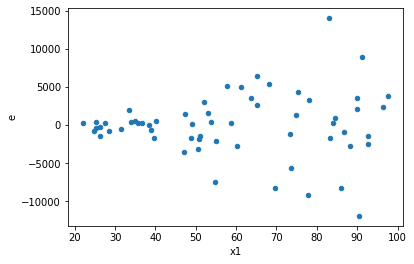

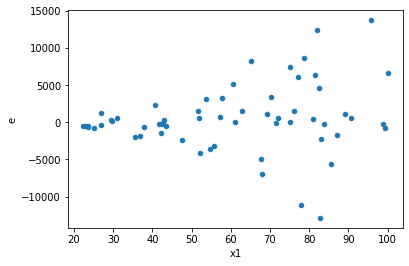

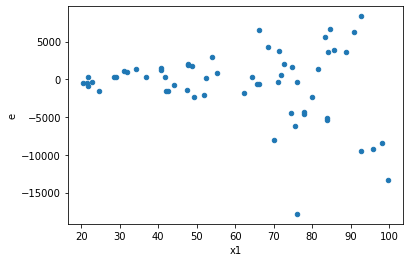

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,41568038.55535245,778132186.2357107,1807306.0241457587,33831834.184161335,18.71948288345483,1.0745273559820134e-09,0.9999999994627363,5.372636779910067e-10,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,88196664.83975416,1617300084.714857,3834637.601728442,70317394.98760249,18.33742905872182,1.3320904379554577e-09,0.9999999993339548,6.660452189777288e-10,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,109908365.3824998,1423947983.8442166,4778624.581847818,61910781.90627029,12.95577437521371,4.624977356648685e-08,0.9999999768751132,2.3124886783243426e-08,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,34828771.55271061,1326905343.3800676,1514294.4153352438,57691536.668698594,38.09796568253637,5.269118474870993e-13,0.9999999999997365,2.6345592374354965e-13,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,28709848.564859044,1175071547.9614372,1248254.2854286542,51090067.30267119,40.92921442294645,2.398081733190338e-13,0.9999999999998801,1.199040866595169e-13,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,80001645.64885135,1353255052.2087286,3478332.419515276,58837176.1829882,16.915340193732106,3.075926624518388e-09,0.9999999984620367,1.537963312259194e-09,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,33874103.78403932,910539282.0782005,1472787.1210451878,39588664.43818263,26.880099555791794,2.3244073332762127e-11,0.999999999988378,1.1622036666381064e-11,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,33784194.31803899,831895839.0845344,1468878.0138277824,36169384.30802324,24.623817612851745,5.944311709527028e-11,0.9999999999702784,2.972155854763514e-11,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,40495273.10986175,892962624.4798603,1760664.0482548585,38824461.93390697,22.051033513400327,1.9214119184596257e-10,0.9999999999039294,9.607059592298128e-11,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,41568038.55535245,778132186.2357107,1807306.0241457587,33831834.184161335,18.71948288345483,1.0745273559820134e-09,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,88196664.83975416,1617300084.714857,3834637.601728442,70317394.98760249,18.33742905872182,1.3320904379554577e-09,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,109908365.3824998,1423947983.8442166,4778624.581847818,61910781.90627029,12.95577437521371,4.624977356648685e-08,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,34828771.55271061,1326905343.3800676,1514294.4153352438,57691536.668698594,38.09796568253637,5.269118474870993e-13,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,28709848.564859044,1175071547.9614372,1248254.2854286542,51090067.30267119,40.92921442294645,2.398081733190338e-13,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,80001645.64885135,1353255052.2087286,3478332.419515276,58837176.1829882,16.915340193732106,3.075926624518388e-09,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,33874103.78403932,910539282.0782005,1472787.1210451878,39588664.43818263,26.880099555791794,2.3244073332762127e-11,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,33784194.31803899,831895839.0845344,1468878.0138277824,36169384.30802324,24.623817612851745,5.944311709527028e-11,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,40495273.10986175,892962624.4798603,1760664.0482548585,38824461.93390697,22.051033513400327,1.9214119184596257e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64